In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
voice=pd.read_csv("voice.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [5]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0
5,0.441173,0.631448,0.432029,0.274076,0.722901,0.534679,0.051782,0.004773,0.922681,0.870197,...,0.441173,0.299699,0.037761,0.857144,0.098448,0.006452,0.124375,0.124464,0.134238,1.0
6,0.526061,0.578887,0.595932,0.375003,0.706098,0.413441,0.040161,0.002997,0.940728,0.900382,...,0.526061,0.276701,0.084682,0.929285,0.159942,0.006452,0.242673,0.242847,0.132985,1.0
7,0.572113,0.602659,0.532916,0.446359,0.819942,0.449670,0.036301,0.002064,0.906544,0.847309,...,0.572113,0.205893,0.041084,0.233218,0.099505,0.006452,0.024303,0.024320,0.304531,1.0
8,0.485814,0.615573,0.509942,0.356014,0.718545,0.445258,0.027701,0.001531,0.953672,0.910746,...,0.485814,0.226085,0.042110,0.834600,0.111416,0.006452,0.098642,0.098712,0.159026,1.0
9,0.448457,0.639632,0.441466,0.304920,0.689783,0.470487,0.030322,0.002079,0.972260,0.952323,...,0.448457,0.276351,0.049021,0.904450,0.112734,0.023656,0.214439,0.214235,0.096442,1.0


In [9]:
train, test = train_test_split(voice, test_size=0.3)

In [10]:
trainFeatures = train.iloc[:, :-1]
trainLabel = train["label"]
testFeatures = test.iloc[:, :-1]
testLabel = test["label"]

In [6]:
from sklearn import ensemble

In [25]:
model=ensemble.RandomForestClassifier(n_estimators=5000)

In [26]:
model.fit(trainFeatures,trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
importances=model.feature_importances_
importances

array([0.01858954, 0.08551449, 0.01324711, 0.13830595, 0.01087363,
       0.18840234, 0.00976116, 0.00789661, 0.0451439 , 0.03453257,
       0.01881557, 0.01853213, 0.35336817, 0.00963938, 0.00496756,
       0.008291  , 0.00805265, 0.00972578, 0.00938811, 0.00695236])

In [35]:
indices=np.argsort(importances)[::-1]
indices

array([12,  5,  3,  1,  8,  9, 10,  0, 11,  2,  4,  6, 17, 13, 18, 15, 16,
        7, 19, 14], dtype=int64)

In [36]:
featLabels=voice.columns[1:]
featLabels

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm',
       'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom',
       'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [56]:
featLabels[12]

'minfun'

In [75]:
for f in range(trainFeatures.shape[1]):
    print('%d %-*s %f' %(f+1,10,featLabels[indices[f]-1],importances[indices[f]]))

 1 meanfun    0.353368
 2 IQR        0.188402
 3 Q25        0.138306
 4 sd         0.085514
 5 sp.ent     0.045144
 6 sfm        0.034533
 7 mode       0.018816
 8 label      0.018590
 9 centroid   0.018532
10 median     0.013247
11 Q75        0.010874
12 skew       0.009761
13 maxdom     0.009726
14 minfun     0.009639
15 dfrange    0.009388
16 meandom    0.008291
17 mindom     0.008053
18 kurt       0.007897
19 modindx    0.006952
20 maxfun     0.004968


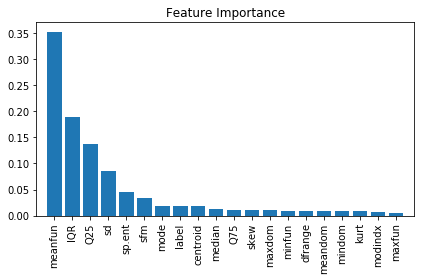

In [78]:
plt.title('Feature Importance')
plt.bar(range(trainFeatures.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(trainFeatures.shape[1]),
          featLabels[indices-1],rotation=90)
plt.xlim([-1,trainFeatures.shape[1]])
plt.tight_layout()
plt.show()